In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import warnings

In [3]:
pd.set_option('display.max_columns', None)
pd.options.mode.use_inf_as_na = True
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('G:\IDS2018\datasets\Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')

# 数据总体了解

In [3]:
data.shape

(1048575, 80)

In [4]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [10]:
data.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.043654e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.392499e+03,9.518465e+00,1.430739e+07,5.145998e+00,6.419784e+00,4.354262e+02,4.925884e+03,1.514397e+02,1.397992e+01,4.472574e+01,5.079972e+01,3.305074e+02,3.365044e+01,1.205176e+02,1.204887e+02,inf,inf,3.049942e+06,1.464573e+06,6.777187e+06,2.363819e+06,1.382441e+07,3.621013e+06,1.368399e+06,6.448757e+06,2.796781e+06,1.004186e+07,1.419460e+06,1.183067e+06,3.671905e+06,6.486163e+05,5.123811e-02,0.0,0.0,0.0,1.057125e+02,1.345203e+02,3.702592e+04,3.648275e+03,1.380783e+01,3.402048e+02,7.994317e+01,1.096400e+02,3.880481e+04,5.867010e-03,5.123811e-02,6.098658e-02,3.634781e-01,2.856267e-01,4.781155e-02,0.0,6.098467e-02,5.757566e-01,9.317982e+01,4.472574e+01,1.205176e+02,0.0,0.0,0.0,0.0,0.0,0.0,5.145998e+00,4.354262e+02,6.419784e+00,4.925884e+03,5.221909e+03,5.600345e+03,1.882254e+00,1.659039e+01,1.122396e+05,4.836921e+04,1.817948e+05,8.320523e+04,4.347475e+06,2.658500e+05,4.616676e+06,4.109270e+06
std,1.753869e+04,5.303721e+00,3.335503e+07,3.379921e+01,9.786280e+01,2.881334e+04,1.399474e+05,2.774302e+02,2.382720e+01,6.052267e+01,9.133395e+01,4.938690e+02,5.568782e+01,1.850138e+02,2.068673e+02,NaN,NaN,1.128536e+07,5.401832e+06,1.730306e+07,1.101372e+07,3.327526e+07,1.264398e+07,4.632874e+06,1.716500e+07,1.256292e+07,2.943821e+07,7.289544e+06,4.135576e+06,1.279009e+07,6.418770e+06,2.204831e-01,0.0,0.0,0.0,7.913670e+02,1.962800e+03,2.511116e+05,4.402206e+04,2.251720e+01,5.127492e+02,1.188695e+02,1.636579e+02,1.725620e+05,7.637142e-02,2.204831e-01,2.393058e-01,4.810010e-01,4.517126e-01,2.133674e-01,0.0,2.393023e-01,7.309666e-01,1.224958e+02,6.052267e+01,1.850138e+02,0.0,0.0,0.0,0.0,0.0,0.0,3.379921e+01,2.881334e+04,9.786280e+01,1.399474e+05,1.053626e+04,1.712450e+04,5.656394e+00,7.476644e+00,9.456190e+05,3.772539e+05,1.205154e+06,8.678863e+05,1.422425e+07,2.349741e+06,1.486555e+07,1.398498e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [11]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,56321077,56320081,112641158,5.632058e+07,7.042784e+02,56321077,56320081,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,154.857143,254.855270,976,0,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,15617415,7,37366762,2.874366e+06,5.104444e+06,15617415,40,37366730,3.396975e+06,5.564224e+06,15936762,893,0,0,0,0,456,416,0.374665,0.321141,0,976,191.148148,320.122898,102478.669516,0,0,0,1,0,0,0,0,0,198.5,154.857143,249.416667,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,32.000000,45.254834,0,0,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,543,543,543,5.430000e+02,0.000000e+00,543,543,0,0.000000e+00,0.000000e+00,0,0,1,0,0,0,64,0,3683.241252,0.000000,0,64,42.666667,36.950417,1365.333333,0,1,0,0,1,0,0,0,0,64.0,32.000000,0.000000,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,56320611,56320092,112640703,5.632035e+07,3.669884e+02,56320611,56320092,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,56320946,56319928,112640874,5.632044e+07,7.198347e+02,56320946,56319928,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [12]:
data.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1048570,50111,6,15/02/2018 09:04:42,22,3,0,31,0,31,0,10.333333,17.897858,0,0,0.000000,0.000000,1.409091e+06,136363.636364,1.100000e+01,1.555635e+01,22,0,22,1.100000e+01,1.555635e+01,22,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,60,0,136363.636364,0.000000,0,31,7.750000,15.500000,240.250000,0,0,0,0,1,0,0,0,0,10.333333,10.333333,0.000000,0,0,0,0,0,0,3,31,0,0,64,-1,1,20,0.0,0.000000,0,0,0.0,0.0000,0,0,Benign
1048571,443,6,15/02/2018 09:03:55,54682783,5,1,123,46,46,0,24.600000,23.276598,46,46,46.000000,0.000000,3.090552e+00,0.109724,1.093656e+07,2.436610e+07,54523813,17,54682783,1.367070e+07,2.723551e+07,54523813,17,0,0.000000e+00,0.000000e+00,0,0,1,0,0,0,100,20,0.091436,0.018287,0,46,30.714286,21.684974,470.238095,0,1,0,0,1,0,0,0,0,35.833333,24.600000,46.000000,0,0,0,0,0,0,5,123,1,46,256,180,2,20,158783.0,0.000000,158783,158783,54523813.0,0.0000,54523813,54523813,Benign
1048572,443,6,15/02/2018 09:03:56,53682093,5,1,123,46,46,0,24.600000,23.276598,46,46,46.000000,0.000000,3.148163e+00,0.111769,1.073642e+07,2.386193e+07,53421756,16,53682093,1.342052e+07,2.666777e+07,53421756,16,0,0.000000e+00,0.000000e+00,0,0,1,0,0,0,100,20,0.093141,0.018628,0,46,30.714286,21.684974,470.238095,0,1,0,0,1,0,0,0,0,35.833333,24.600000,46.000000,0,0,0,0,0,0,5,123,1,46,254,180,2,20,259719.0,0.000000,259719,259719,53421756.0,0.0000,53421756,53421756,Benign
1048573,443,6,15/02/2018 09:03:55,54683364,5,1,123,46,46,0,24.600000,23.276598,46,46,46.000000,0.000000,3.090519e+00,0.109723,1.093667e+07,2.436586e+07,54523593,14,54683364,1.367084e+07,2.723527e+07,54523593,14,0,0.000000e+00,0.000000e+00,0,0,1,0,0,0,100,20,0.091435,0.018287,0,46,30.714286,21.684974,470.238095,0,1,0,0,1,0,0,0,0,35.833333,24.600000,46.000000,0,0,0,0,0,0,5,123,1,46,254,180,2,20,158870.0,0.000000,158870,158870,54523593.0,0.0000,54523593,54523593,Benign
1048574,443,6,15/02/2018 09:02:01,116857161,18,17,1066,5265,281,0,59.222222,87.686980,1460,0,309.705882,498.588729,5.417725e+01,0.299511,3.436975e+06,1.386690e+07,58211839,1,116857161,6.873951e+06,1.927431e+07,58211839,34,116608417,7.288026e+06,1.989665e+07,58375009,1,0,0,0,0,372,352,0.154034,0.145477,0,1460,175.861111,366.002354,133957.723016,0,0,1,1,0,0,0,1,0,180.885714,59.222222,309.705882,0,0,0,0,0,0,18,1066,17,5265,8192,131,8,20,221407.0,48231.753545,255512,187302,58082282.0,183221.2665,58211839,57952725,Benign


# 缺失值和唯一值

In [6]:
print('There are {0} columns in train dataset with missing values.'.format(data.isnull().any().sum()))

There are 2 columns in train dataset with missing values.


In [7]:
have_null_fea_dict = (data.isnull().sum() / len(data)).to_dict()
fea_null_moreThanHalf = {}
for key, value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf

{}

<AxesSubplot:>

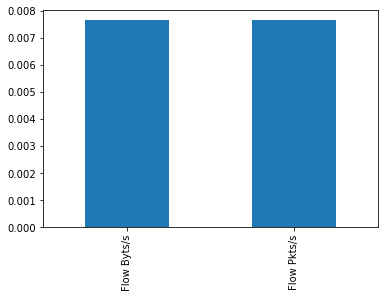

In [8]:
missing = data.isnull().sum() / len(data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [20]:
one_value_fea = [col for col in data.columns if data[col].nunique() <= 1]
one_value_fea

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'CWE Flag Count',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg']

In [21]:
print('There are {0} columns in train dataset with one unique value.'.format(len(one_value_fea)))

There are 10 columns in train dataset with one unique value.


# 查看数据类型

In [11]:
numerical_fea = list(data.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea, list(data.columns)))

In [12]:
numerical_fea

['Dst Port',
 'Protocol',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 '

In [13]:
category_fea

['Timestamp', 'Label']

In [14]:
data.Timestamp

0          15/02/2018 08:25:18
1          15/02/2018 08:29:05
2          15/02/2018 08:29:42
3          15/02/2018 08:28:07
4          15/02/2018 08:30:56
                  ...         
1048570    15/02/2018 09:04:42
1048571    15/02/2018 09:03:55
1048572    15/02/2018 09:03:56
1048573    15/02/2018 09:03:55
1048574    15/02/2018 09:02:01
Name: Timestamp, Length: 1048575, dtype: object

In [15]:
data.Label

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
1048570    Benign
1048571    Benign
1048572    Benign
1048573    Benign
1048574    Benign
Name: Label, Length: 1048575, dtype: object

In [16]:
def get_numerical_serial_fea(data, feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
        else:
            numerical_serial_fea.append(fea)
    return numerical_serial_fea, numerical_noserial_fea
numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(data, numerical_fea)

In [17]:
numerical_serial_fea

['Dst Port',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean'

In [18]:
numerical_noserial_fea

['Protocol',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg']

In [12]:
for fea in numerical_noserial_fea:
    print(data[fea].value_counts())

6     684486
17    345524
0      18565
Name: Protocol, dtype: int64
0    994848
1     53727
Name: Fwd PSH Flags, dtype: int64
0    1048575
Name: Bwd PSH Flags, dtype: int64
0    1048575
Name: Fwd URG Flags, dtype: int64
0    1048575
Name: Bwd URG Flags, dtype: int64
0    1042423
1       6152
Name: FIN Flag Cnt, dtype: int64
0    994848
1     53727
Name: SYN Flag Cnt, dtype: int64
0    984626
1     63949
Name: RST Flag Cnt, dtype: int64
0    667441
1    381134
Name: PSH Flag Cnt, dtype: int64
0    749074
1    299501
Name: ACK Flag Cnt, dtype: int64
0    998441
1     50134
Name: URG Flag Cnt, dtype: int64
0    1048575
Name: CWE Flag Count, dtype: int64
0    984628
1     63947
Name: ECE Flag Cnt, dtype: int64
0    1048575
Name: Fwd Byts/b Avg, dtype: int64
0    1048575
Name: Fwd Pkts/b Avg, dtype: int64
0    1048575
Name: Fwd Blk Rate Avg, dtype: int64
0    1048575
Name: Bwd Byts/b Avg, dtype: int64
0    1048575
Name: Bwd Pkts/b Avg, dtype: int64
0    1048575
Name: Bwd Blk Rate Avg, dtype

In [13]:
for fea in category_fea:
    print(data[fea].value_counts())

15/02/2018 09:53:24    728
15/02/2018 11:41:34    586
15/02/2018 09:49:44    550
15/02/2018 09:56:40    448
15/02/2018 09:30:01    447
                      ... 
15/02/2018 05:45:45      1
15/02/2018 05:48:45      1
15/02/2018 05:41:01      1
15/02/2018 05:52:46      1
15/02/2018 02:43:55      1
Name: Timestamp, Length: 33862, dtype: int64
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64


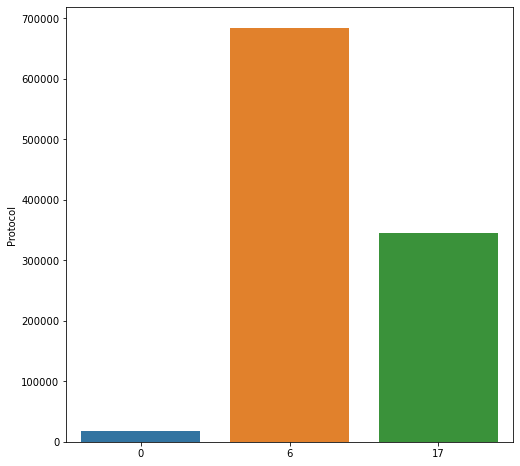

In [44]:
plt.figure(figsize=(8, 8))
sns.barplot(data['Protocol'].value_counts(dropna=False).keys(),
            data['Protocol'].value_counts(dropna=False))
plt.show()

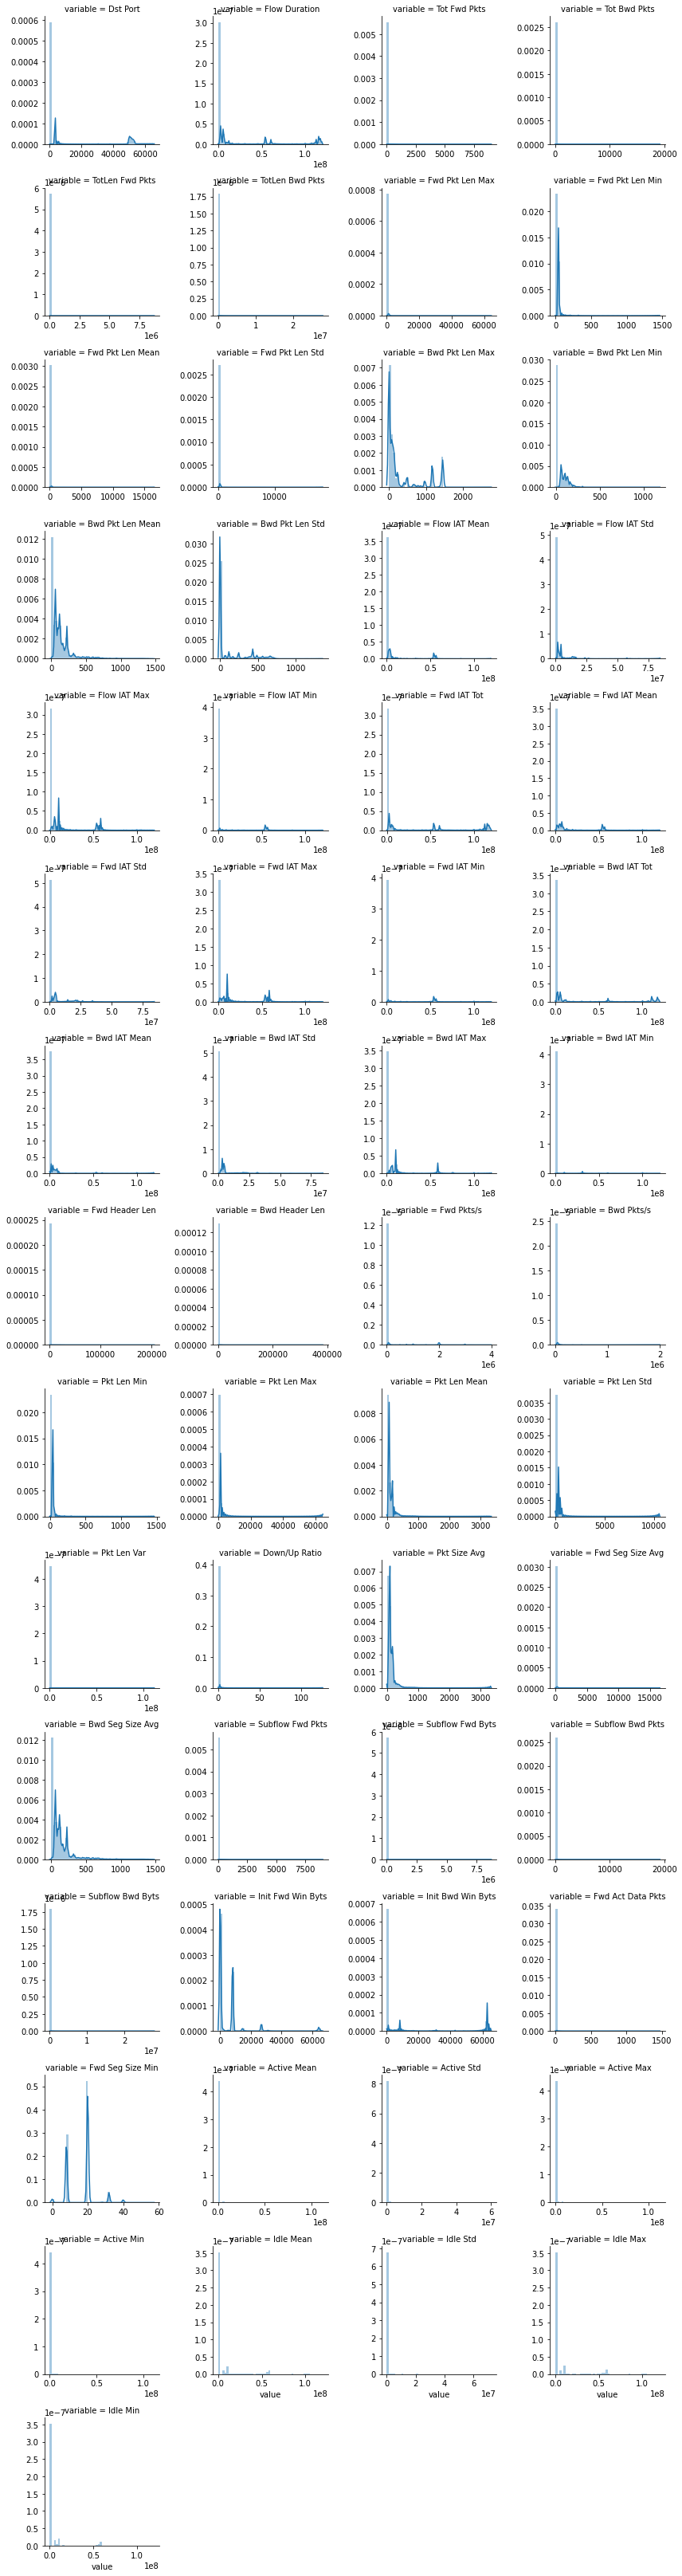

In [33]:
f = pd.melt(data, value_vars=[fea for fea in numerical_serial_fea if fea not in ['Flow Byts/s', 'Flow Pkts/s']])
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False) # col_wrap设置一行有几列
g = g.map(sns.distplot, "value")

# 数据间相关关系

In [4]:
train_benign = data.loc[data['Label'] == 'Benign']
train_ddos = data.loc[data['Label'] != 'Benign']

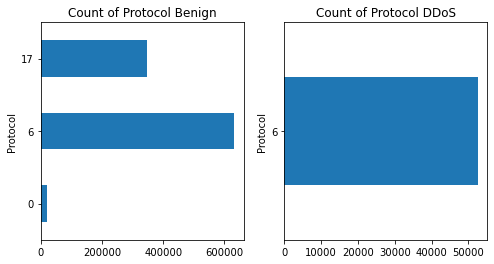

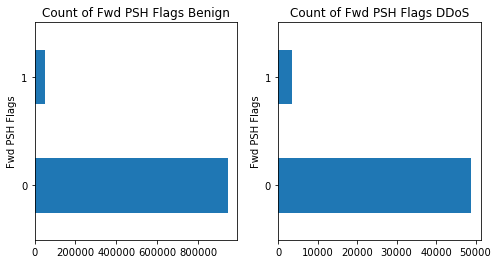

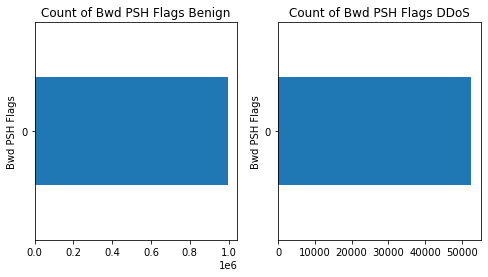

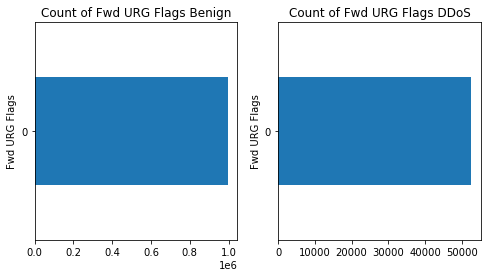

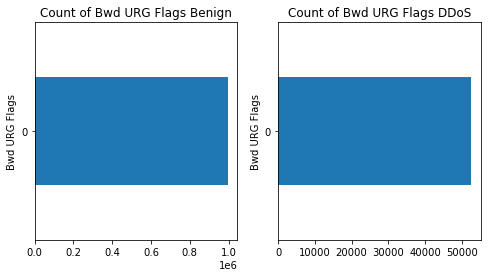

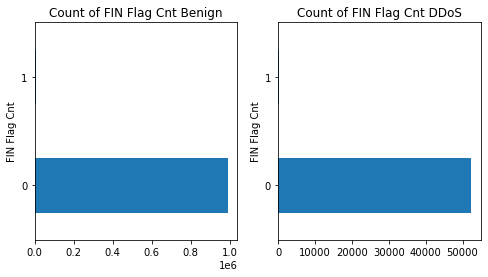

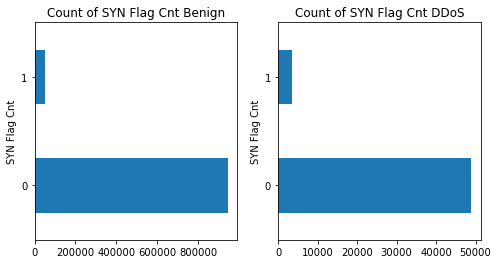

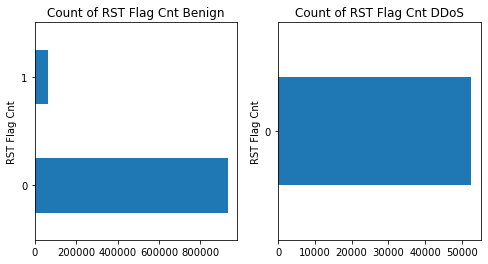

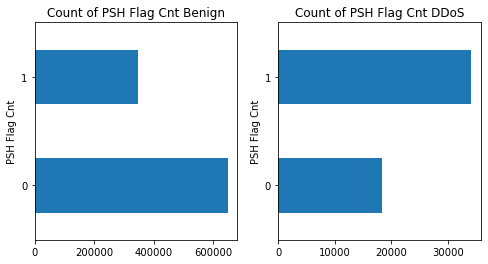

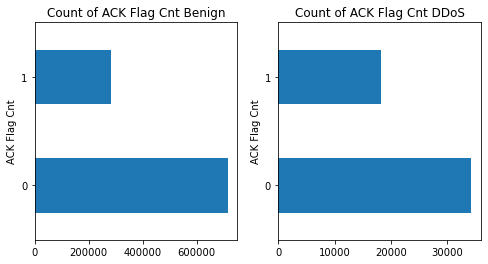

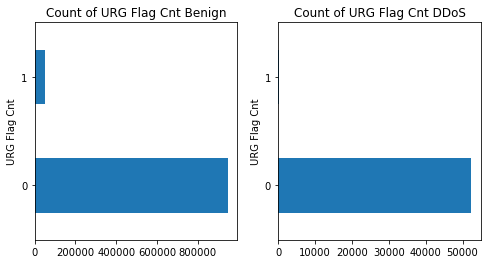

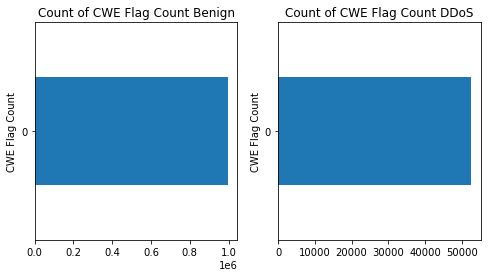

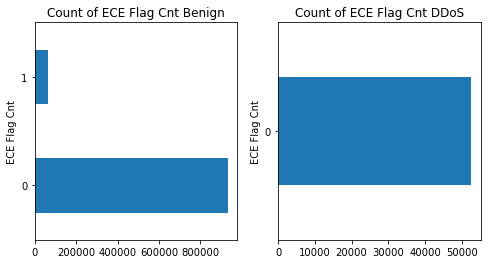

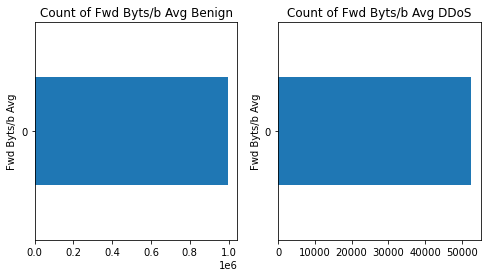

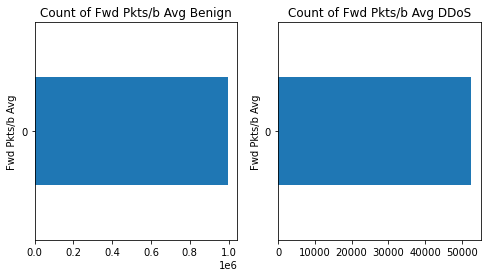

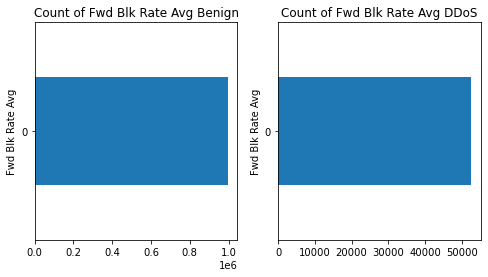

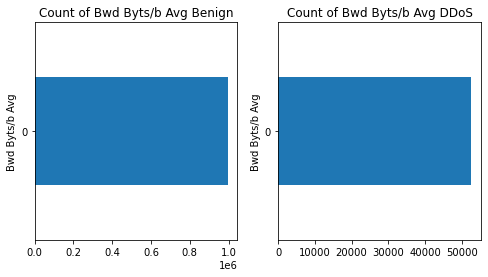

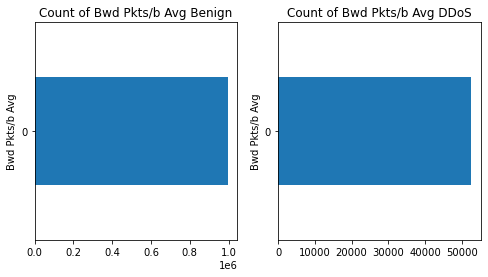

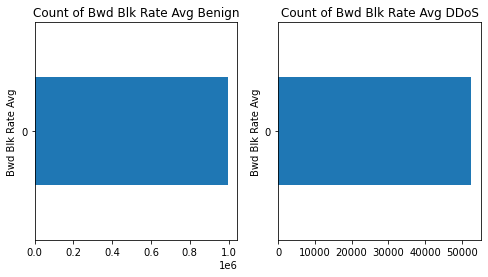

In [19]:
for fea in numerical_noserial_fea:
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(8, 4))
    train_benign.groupby(fea)[fea].count().plot(kind='barh', ax=ax1, title='Count of '+ fea + ' Benign')
    train_ddos.groupby(fea)[fea].count().plot(kind='barh', ax=ax2, title='Count of '+ fea + ' DDoS')
    plt.show()

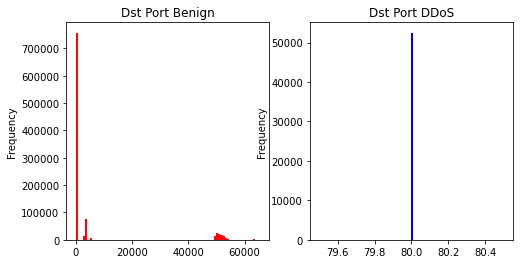

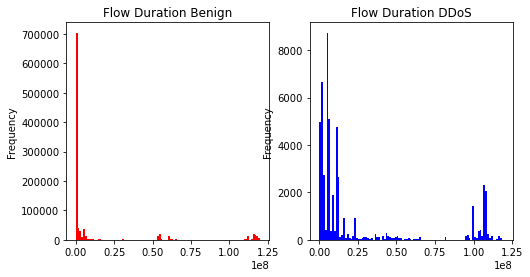

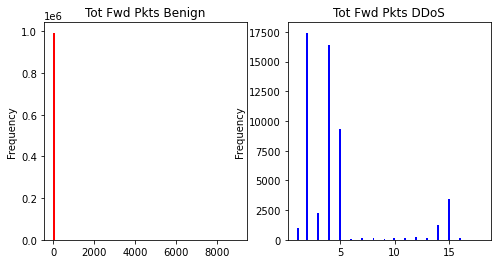

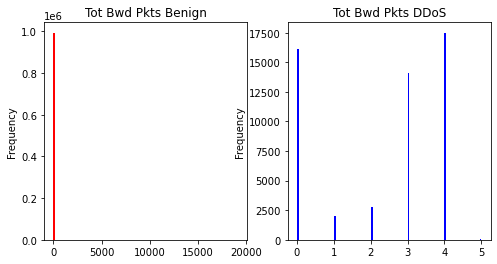

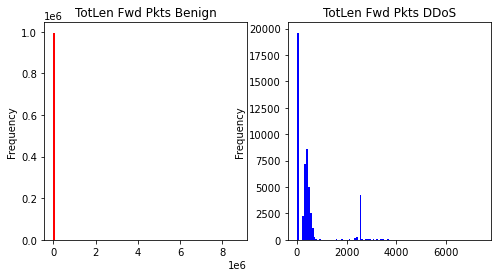

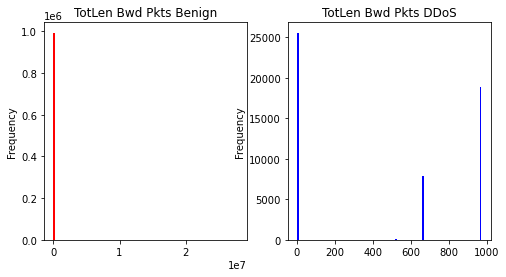

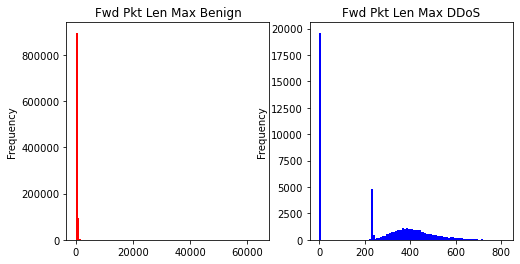

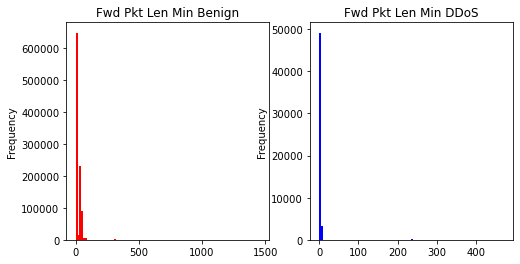

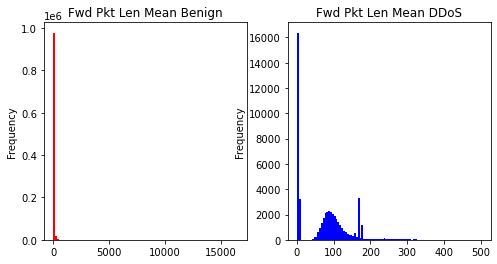

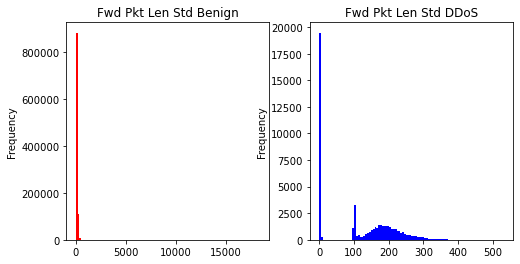

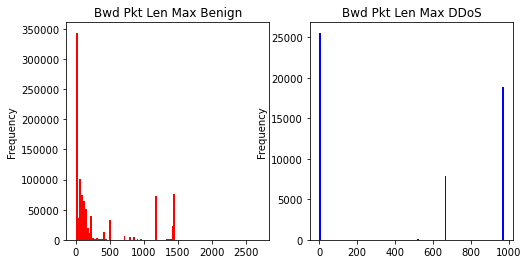

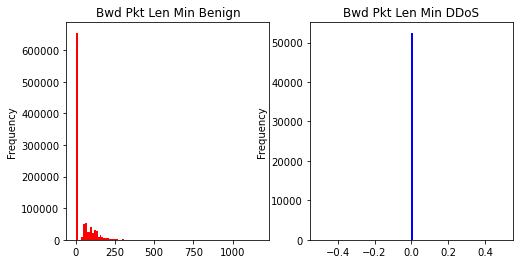

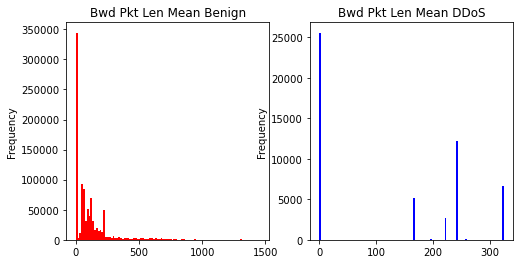

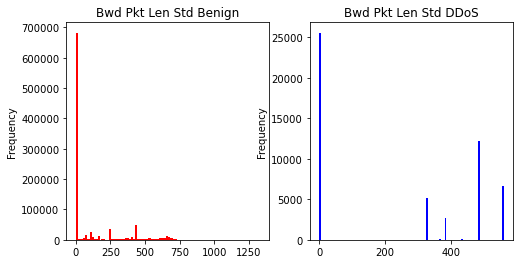

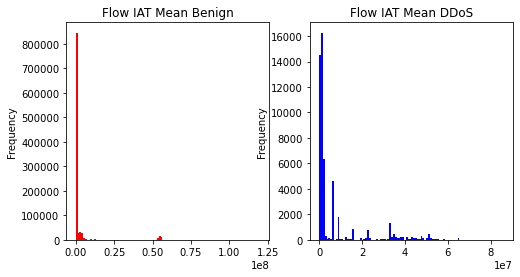

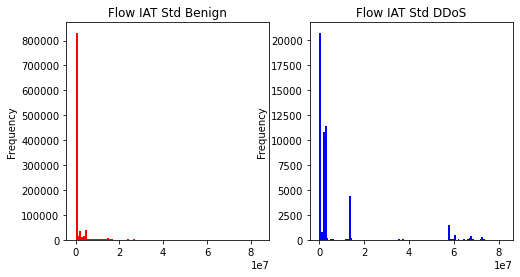

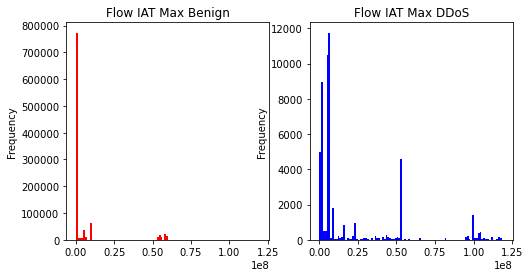

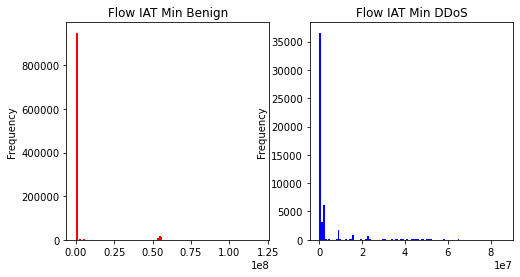

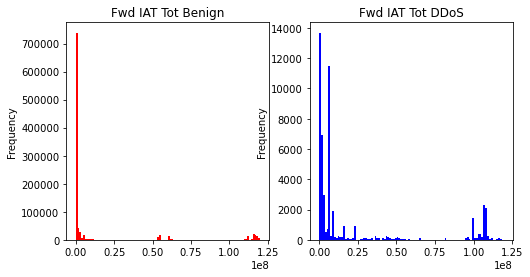

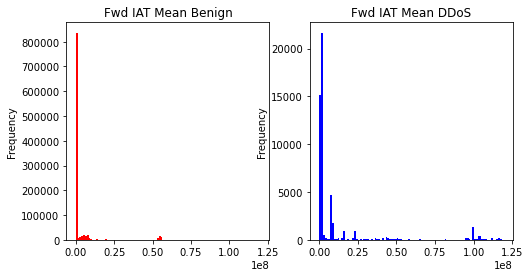

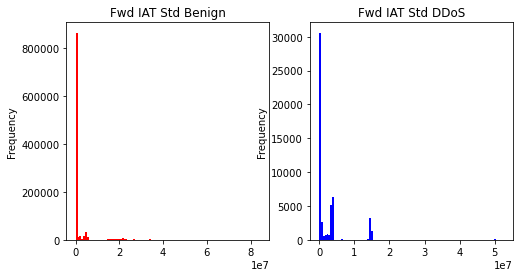

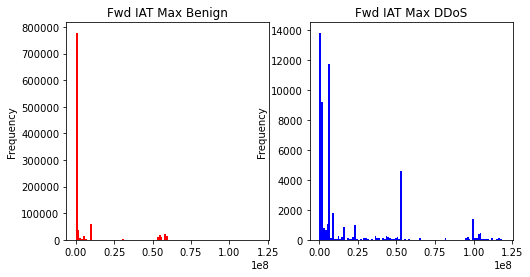

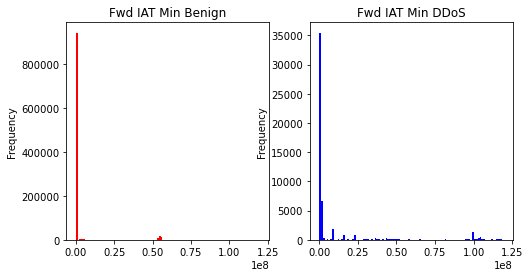

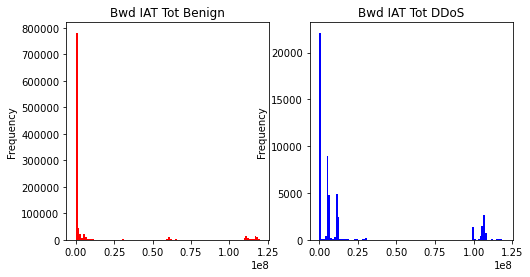

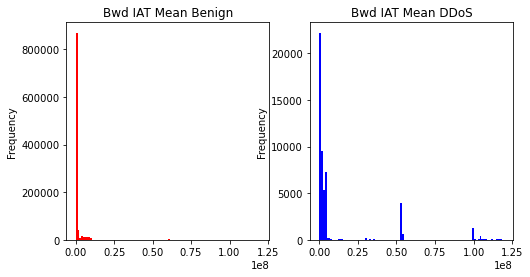

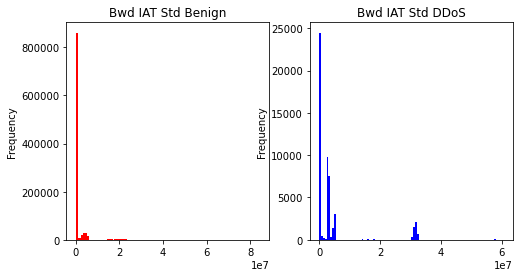

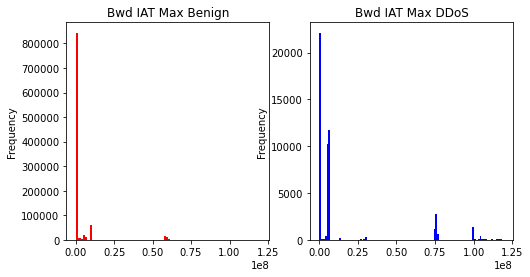

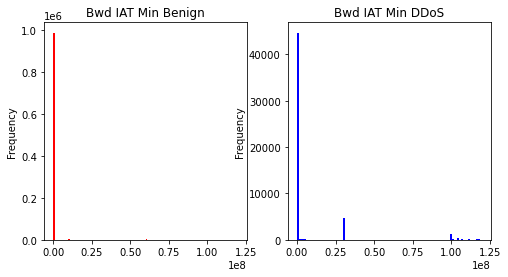

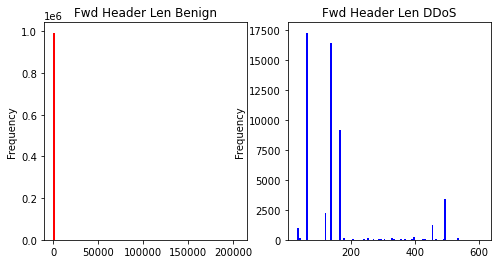

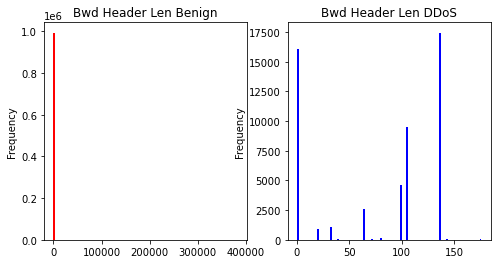

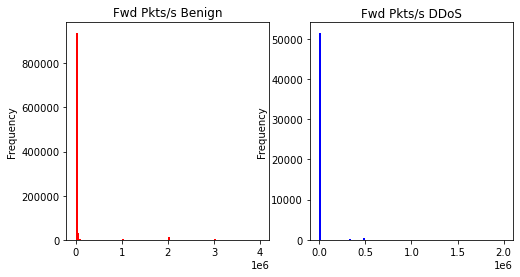

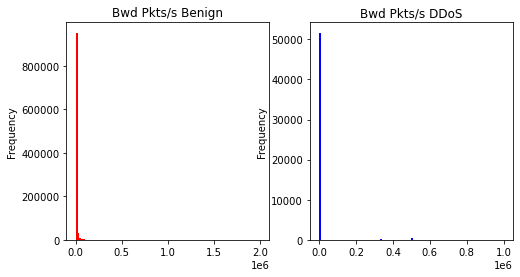

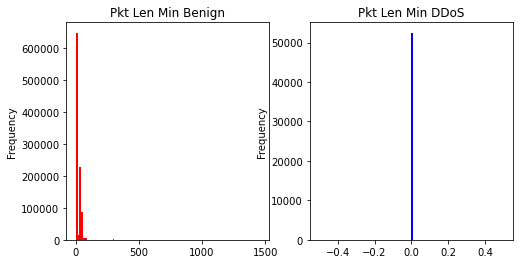

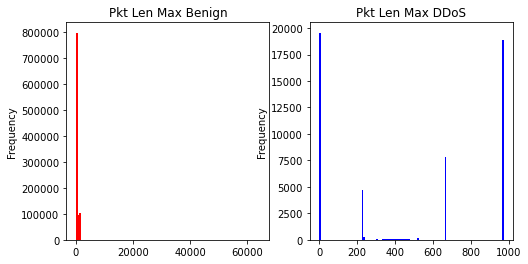

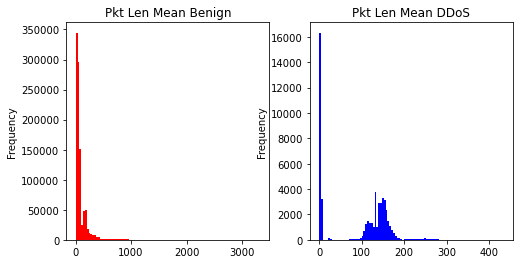

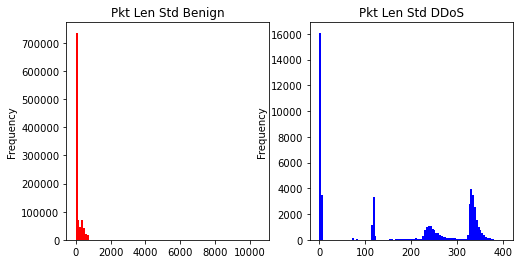

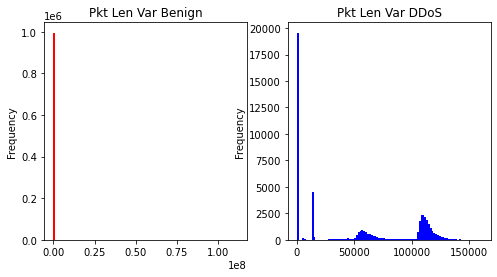

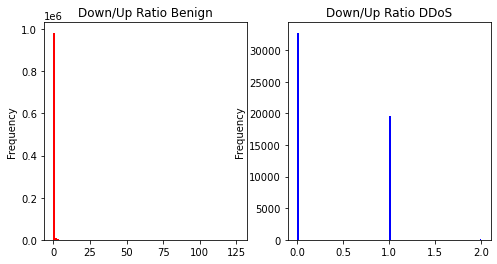

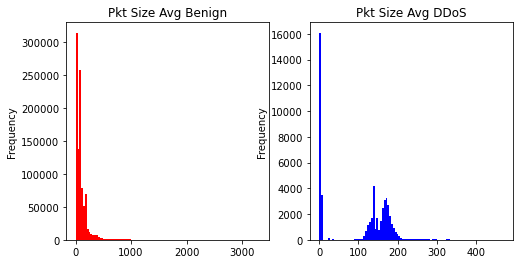

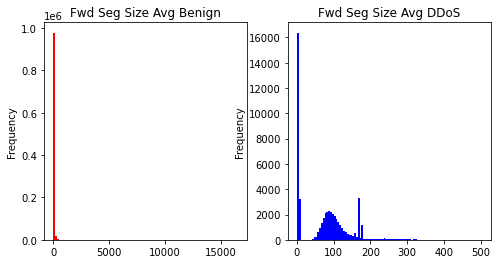

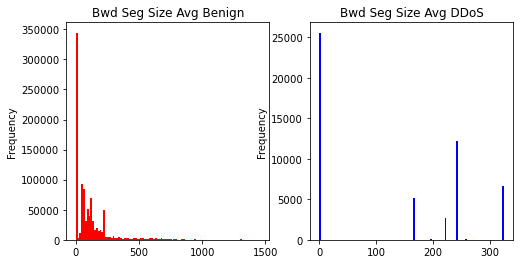

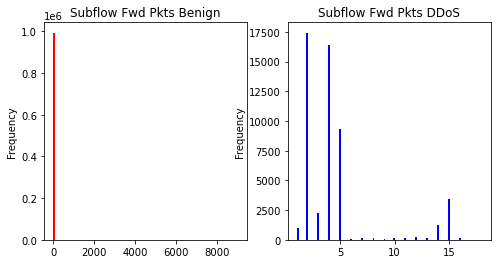

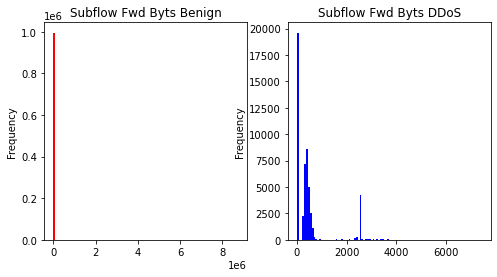

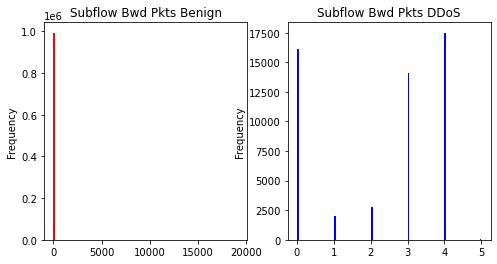

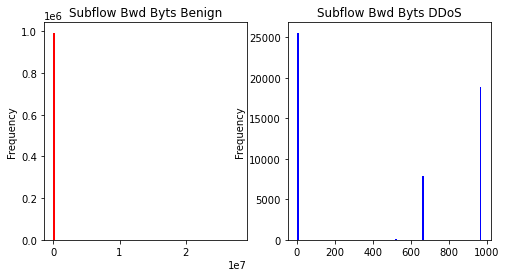

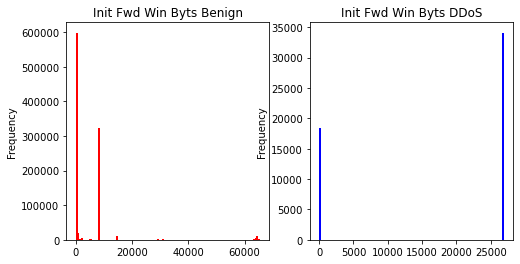

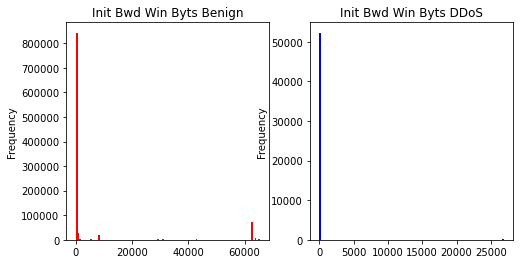

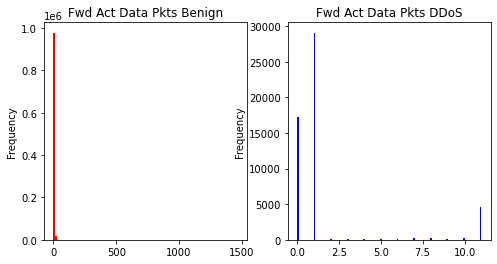

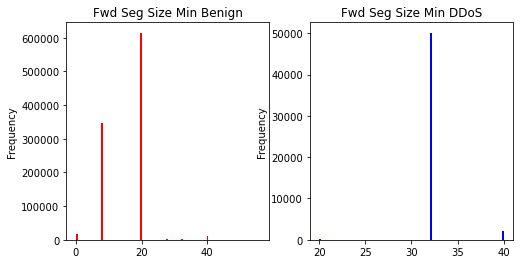

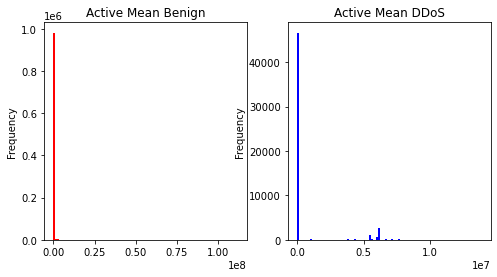

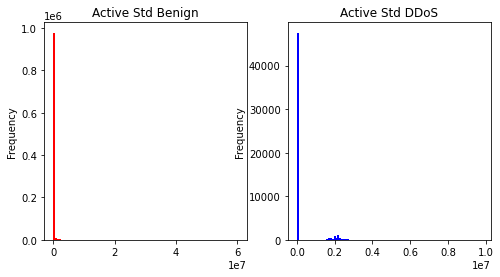

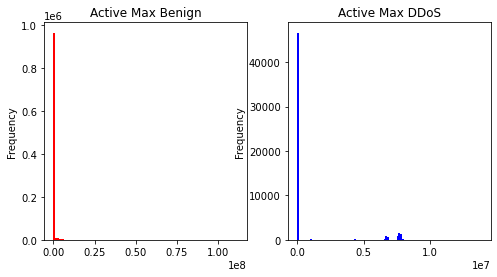

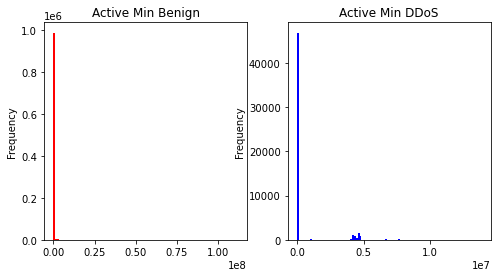

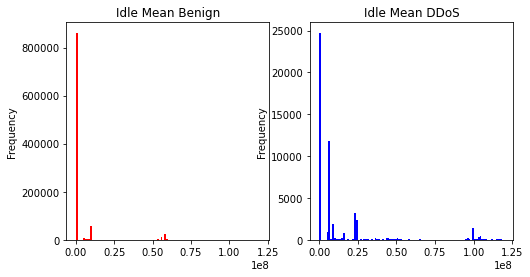

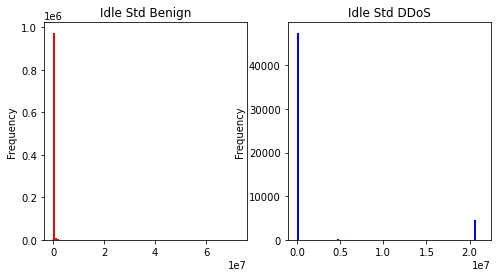

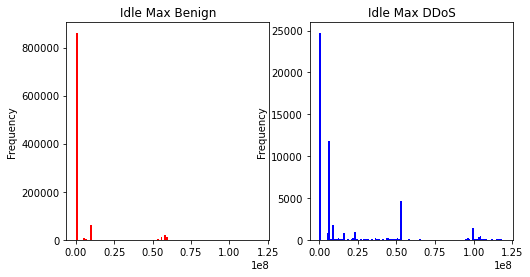

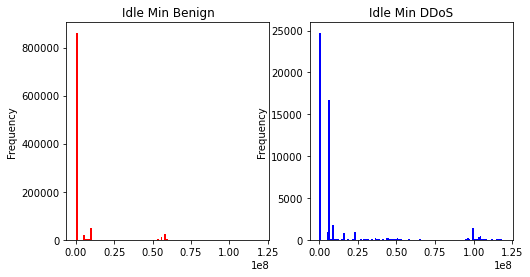

In [24]:
for fea in [fea for fea in numerical_serial_fea if fea not in ['Flow Byts/s', 'Flow Pkts/s']]:
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(8, 4))
    train_benign[fea].plot(kind='hist', bins=100, title=fea + ' Benign', color='r', ax=ax1) # bins指定直方个数
    train_ddos[fea].plot(kind='hist', bins=100, title=fea + ' DDoS', color='b', ax=ax2)
    plt.show()

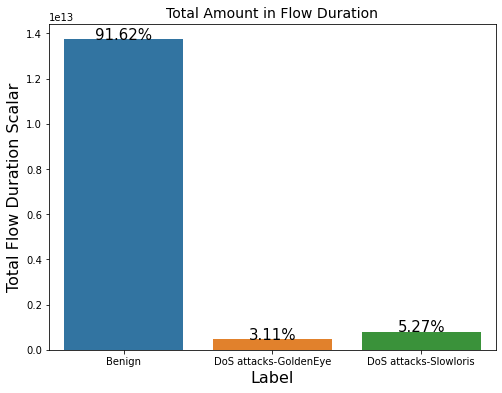

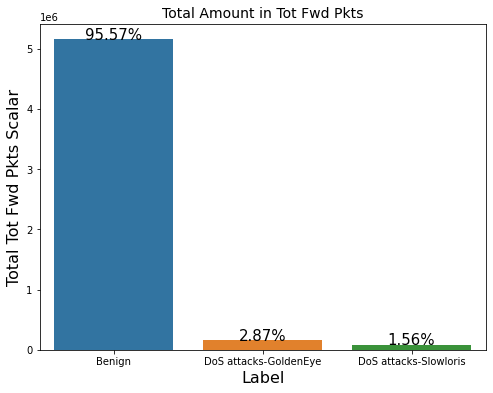

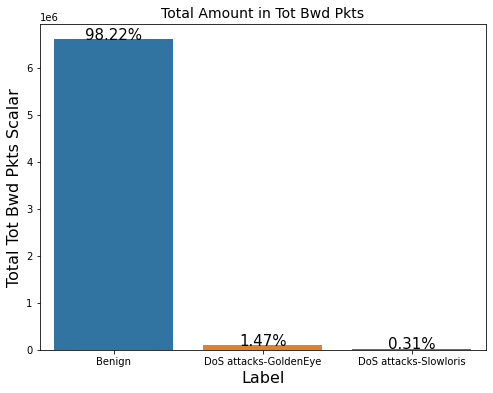

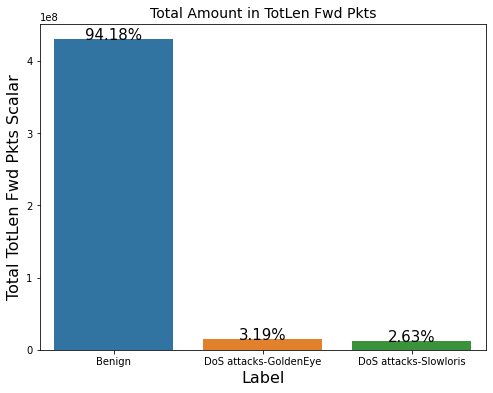

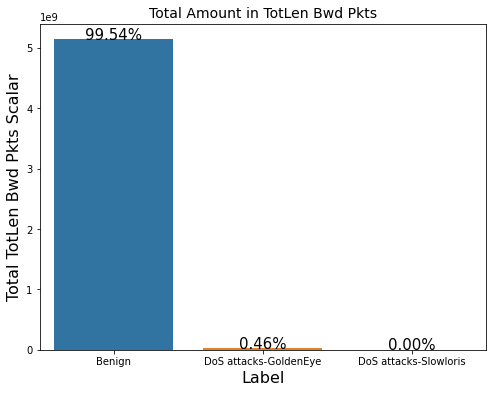

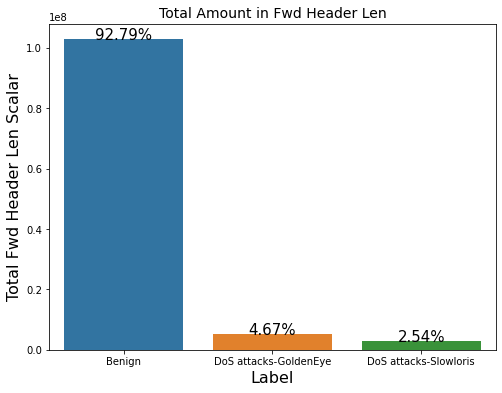

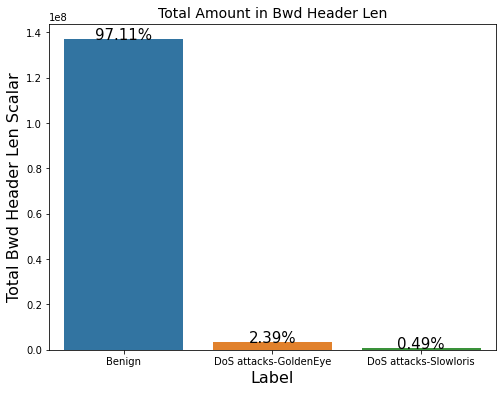

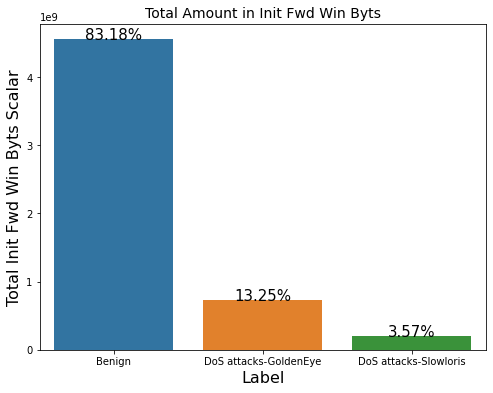

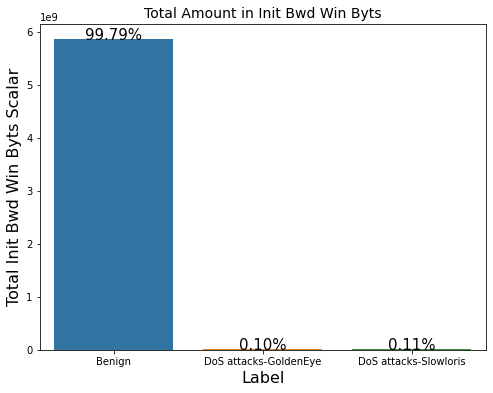

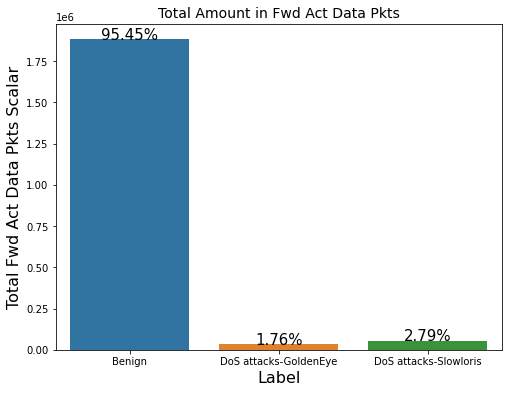

In [37]:
for fea in ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Header Len', 'Bwd Header Len',
            'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts']:
    plt.figure(figsize=(8, 6))
    total_fea = data.groupby(['Label'])[fea].sum().sum()
    percent_fea = data.groupby(['Label'])[fea].sum()
    percent_fea = percent_fea.reset_index()
    plot_per = sns.barplot(x='Label', y=fea, dodge=True, data=percent_fea)
    plot_per.set_title('Total Amount in ' + fea, fontsize=14)
    plot_per.set_xlabel('Label', fontsize=16)
    plot_per.set_ylabel('Total '+ fea + ' Scalar', fontsize=16)
    for p in plot_per.patches:
        height = p.get_height()
        plot_per.text(p.get_x() + p.get_width() / 2, height + 3, '{0:.2f}%'.format(height / total_fea * 100), ha='center', fontsize=15) 
    plt.show()

# 日期时间处理

In [46]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# 数据透视表

In [63]:
pd.pivot_table(data, index=['Label'], columns=['Protocol'], values=['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 
                                                                    'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Header Len', 
                                                                    'Bwd Header Len', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 
                                                                    'Fwd Act Data Pkts'], aggfunc=np.mean)

Bwd Header Len                       Flow Duration  \
Protocol                          0           6         17            0    
Label                                                                      
Benign                           0.0  211.803503  9.052523  8.349589e+07   
DoS attacks-GoldenEye            NaN   81.234943       NaN           NaN   
DoS attacks-Slowloris            NaN   63.473339       NaN           NaN   

                                                   Fwd Act Data Pkts  \
Protocol                         6              17                0    
Label                                                                  
Benign                 1.911027e+07  339983.853744               0.0   
DoS attacks-GoldenEye  1.123344e+07            NaN               NaN   
DoS attacks-Slowloris  7.198034e+07            NaN               NaN   

                                          Fwd Header Len              \
Protocol                     6         17             0           6    
Label                                                                  
Benign                 2.866651  0.209025            0.0  157.455496   
DoS attacks-GoldenEye  0.837790       NaN            NaN  124.781825   
DoS attacks-Slowloris  5.004368       NaN            NaN  256.240218   

                                Init Bwd Win Byts                    \
Protocol                     17                0            6    17   
Label                                                                 
Benign                 9.672196              -1.0  9273.129238 -1.0   
DoS attacks-GoldenEye       NaN               NaN   141.152380  NaN   
DoS attacks-Slowloris       NaN               NaN   580.590628  NaN   

                      Init Fwd Win Byts                    Tot Bwd Pkts  \
Protocol                             0             6    17           0    
Label                                                                     
Benign                             -1.0   7207.379173 -1.0     0.131538   
DoS attacks-GoldenEye               NaN  17475.330009  NaN          NaN   
DoS attacks-Slowloris               NaN  17796.587716  NaN          NaN   

                                          Tot Fwd Pkts                      \
Protocol                     6         17           0         6         17   
Label                                                                        
Benign                 9.839029  1.131565     5.308376  7.342943  1.209025   
DoS attacks-GoldenEye  2.384504       NaN          NaN  3.728775       NaN   
DoS attacks-Slowloris  1.917743       NaN          NaN  7.665332       NaN   

                      TotLen Bwd Pkts                           \
Protocol                           0            6           17   
Label                                                            
Benign                            0.0  8070.277713  119.139432   
DoS attacks-GoldenEye             NaN   568.601571         NaN   
DoS attacks-Slowloris             NaN     6.667152         NaN   

                      TotLen Fwd Pkts                          
Protocol                           0            6          17  
Label                                                          
Benign                            0.0   652.709112  50.651144  
DoS attacks-GoldenEye             NaN   351.152284        NaN  
DoS attacks-Slowloris             NaN  1091.525933        NaN

# pandas_profiling生成报告

In [62]:
pfr = pandas_profiling.ProfileReport(data)
pfr.to_file('example.html')